In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
# from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
# plt.style.use('dark_background')  # for dark style plots

## Function Definitions

In [90]:
def randFRs(n,t):
    '''
    generate matrix of random numbers representing neuronal firing rates
    inputs: 
            n : number of neurons
            t : number of time points to generate data for
    output:
            r : matrix of firing rates, size R^(n x t)
    '''
    r = np.ndarray(shape=(n,t)) # neuron firing rates, r \in R^(n x t)
    for i in range(n):
        r[i,:] = np.random.randint(0,10,size=(1,t)) # vector of randints b/w 0 and 10
    return r


def gridFRs(n,t):
    '''
    generate matrix of firing rates. Each vector is a point in a 3D grid
    inputs, ouputs same as randFRs()
    '''

    x_ = np.linspace(0,10,t)
    y_ = np.linspace(0,10,t)
    z_ = np.linspace(0,10,t)
    return np.vstack(np.meshgrid(x_,y_,z_)).reshape(3,-1)


def project(p_mat,mat,n,t):
    '''
    project mat through <p_mat,mat>
    inputs: 
            p_mat : projection matrix
            mat   : matrix to be projected
            n     : number of neurons
            t     : number of time points
    output:
            mat_proj : <p_mat,mat>
    '''
    mat_proj = np.ndarray(shape=(n,t))
    for i in range(t):
        mat_proj[:,i] = p_mat @ mat[:,i]
    return mat_proj


def my_svd(p_mat):
    '''
    TODO : write SVD program
    perform singular value decomposition on input matrix. 
    A = U S V where U = u, S = np.diag(s), and V = v
    inputs: 
            p_mat : projection matrix
    output:
            mat_proj : <p_mat,mat>
            u        : singular vectors of A A^T (column-wise)
            s        : singular values (1D array)
            v        : singular vectors of A^T A (row-wise)
    '''
    u, s, v = np.linalg.svd(P, full_matrices=True)
    return u, s, v


def plotSVs(data):
    # this function just plots the singular vectors in the SVD/PCA/FA plots throughout
    origin = np.ndarray(shape=(3,1)) # define origin to plot singular vectors
    for i in range(n):
        origin[i] = np.abs(np.max(data[i,:]) - np.min(data[i,:])) / 2
    # first SV
    ax.quiver(origin[0],origin[1],origin[2],v[0,0],v[0,1],v[0,2],color='green',length=s[0]+2, \
              linewidths=2)
    # last SV
    ax.quiver(origin[0],origin[1],origin[2],v[2,0],v[2,1],v[2,2],color='red',length=s[2]+1, \
              linewidths=2)   
    

def cleanPlot():
    # so I don't have to keep doing this
    font = {'weight' : 'bold',
            'size'   : 18}
    plt.rc('font', **font)
    ax.set_xlabel('$r_1$')
    ax.set_ylabel('$r_2$')
    ax.set_zlabel('$r_3$')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.grid(False)
    
    
def uncleanPlot():
    font = {'weight': 'normal',
            'size'  : 12}
    plt.rc('font', **font)
    
    
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Pulled from matplotlib docs because it's much better than what I wrote:
    https://matplotlib.org/3.1.1/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py
    
    Create a plot of the covariance confidence ellipse of `x` and `y`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
    
    
def pca2D(data, ax):
    '''
    Compute pca of 2d input data, then plot along with projection and PCs
    input: np array of 2D data
    '''
    
    # SVD
    data_centered = data - np.mean(data,axis=1).reshape(2,1)
    data_cov = data_centered @ data_centered.T # covariance matrix (<x,x.T>)
    u, s, v = np.linalg.svd(data_cov, full_matrices=True) # svd
    dir_max_var = v[:,0] # direction of maximal variance
    dir_min_var = v[:,1] # dir of min var

    # # project data
    # data_proj = np.ndarray(shape=(2,t))
    # v_norm = np.sqrt(sum(dir_max_var**2)) 
    # for i in range(t):
    #     data_proj[:,i] = ((data[:,i] @ dir_max_var)/v_norm**2)*dir_max_var

    # project data -- vectorized (gives same output as the for loop version)
    data_proj = data_centered.T @ dir_max_var.reshape(1,2).T @ dir_max_var.reshape(1,2)
    data_proj = data_proj.T

    # plot
    ax.scatter(data_centered[0,:],data_centered[1,:], s=75, c='gray', edgecolors='w',label='original data')
    ax.scatter(data_proj[0,:],data_proj[1,:], s=125,alpha=0.2,c='red', edgecolors='w',label='pca projected data')
    ax.quiver(0,0,dir_max_var[0],dir_max_var[1], \
              color='green',scale=2.3, alpha = 0.7, label ='pca max variance')
    ax.quiver(0,0,-dir_max_var[0],-dir_max_var[1], \
              color='green',scale=2.3, alpha = 0.7)
    ax.quiver(0,0,dir_min_var[0],dir_min_var[1], \
              color='blue',scale=10, alpha = 0.3, label='pca min variance')
    ax.quiver(0,0,-dir_min_var[0],-dir_min_var[1], \
              color='blue',scale=10, alpha = 0.3)    

    
def FA2D(data, ax):
    '''
    Compute FA of 2d input data, then plot along with projection and factor components
    input: np array of 2D data
    '''
    
    # FA
    data_centered = data - np.mean(data,axis=1).reshape(2,1)
    factor = FactorAnalysis().fit(data_centered.T)
    dir_max_var = factor.components_[0,:] / np.linalg.norm(factor.components_[0,:])
    if np.linalg.norm(factor.components_[1,:]) == 0:
        dir_min_var = factor.components_[1,:]
    else:
        dir_min_var = factor.components_[1,:] / np.linalg.norm(factor.components_[1,:])

    # project data -- vectorized (gives same output as the for loop version)
    data_proj = data_centered.T @ dir_max_var.reshape(1,2).T @ dir_max_var.reshape(1,2)
    data_proj = data_proj.T
    
    # plot
    ax.scatter(data_centered[0,:],data_centered[1,:], s=75, c='gray', edgecolors='w')
    ax.scatter(data_proj[0,:],data_proj[1,:], s=125,alpha=0.2,c='cyan', edgecolors='w',label='fa projected data')
    ax.quiver(0,0,dir_max_var[0],dir_max_var[1], \
              color='m',scale=2.3, alpha = 0.7, label ='fa component')
    ax.quiver(0,0,-dir_max_var[0],-dir_max_var[1], \
              color='m',scale=2.3, alpha = 0.7)
    ax.quiver(0,0,dir_min_var[0],dir_min_var[1], \
              color='cyan',scale=10, alpha = 0.3,)
    ax.quiver(0,0,-dir_min_var[0],-dir_min_var[1], \
              color='cyan',scale=10, alpha = 0.3)



## Null and Potent Spaces

### With Random Points

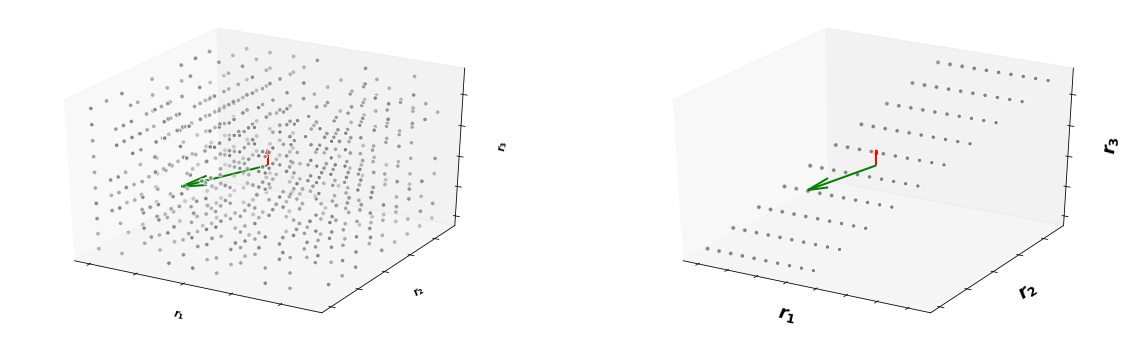

In [3]:
## create matrix of FR vectors 
n = 3 # 3 neurons
t = 1000 # num of time pts
r = randFRs(n,t) # matrix of FRs
# r = gridFRs(n,t)

## define a projection matrix
# P = np.array([[0, 1, 1],
#               [0, 1, 0],
#               [0, 1, 0]])
P = np.array([[1, 1, 0],
              [0, 1, 0],
              [0, 1, 0]])

## project r through <P,r>
r_proj = project(P,r,n,t)

## SVD
u, s, v = my_svd(P)

## plot

# r
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121,projection='3d')
ax.scatter(r[0,:], r[1,:], r[2,:], s=20, c='gray', edgecolors='w')
plotSVs(r)
cleanPlot()

# r_proj
ax = fig.add_subplot(122,projection='3d')
ax.scatter(r_proj[0,:], r_proj[1,:], r_proj[2,:], s=20, c='gray', edgecolors='w')            
plotSVs(r_proj)
cleanPlot()
plt.show()

### With Grid Points

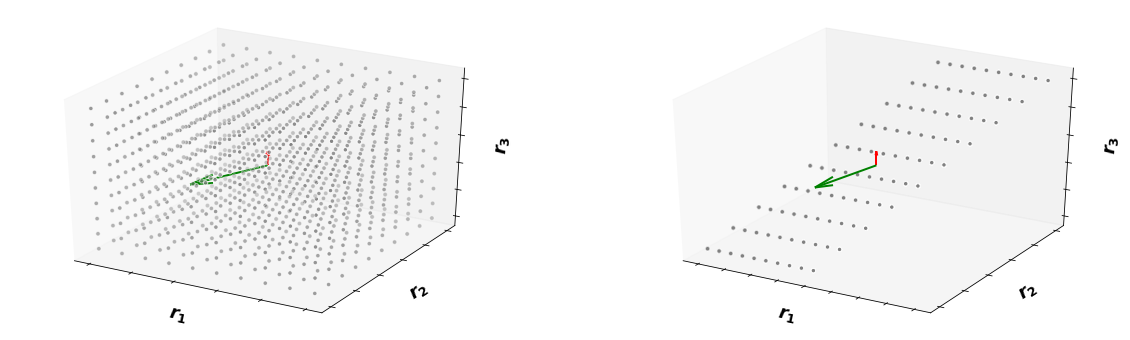

In [4]:
## create grid of FR vectors
n = 3 # 3 neurons
t = 1000 # num of time pts
r = gridFRs(n,int(np.ceil(np.power(t,1/3))))

## define a projection matrix
# P = np.array([[0, 1, 1],
#               [0, 1, 0],
#               [0, 1, 0]])
P = np.array([[1, 1, 0],
              [0, 1, 0],
              [0, 1, 0]])

## project r through <P,r>
r_proj = project(P,r,n,t)

## SVD
u, s, v = my_svd(P)

## plot

# r
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(r[0,:], r[1,:], r[2,:], s=20, c='gray', edgecolors='w')
plotSVs(r)
cleanPlot()

# r_proj
ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter(r_proj[0,:], r_proj[1,:], r_proj[2,:], s=20, c='gray', edgecolors='w')            
plotSVs(r_proj)
cleanPlot()
plt.show()

## PCA

<img src="images/animation_pca.gif" width="750" align="center">


##### PCA Reduces to SVD

Consider the SVD $X = USV^\top$ and what its existence means for $X^\top X$:

\begin{align}
X^\top X = (U S V^\top )^\top (USV^\top) = V S^\top U^\top U S V^\top = V D V^\top
\end{align}

This computation shows that rows of $V^\top$ are the eigenvectors of $X^\top X$, the right singular vectors of $X$ are thee same as the eigenvectors of $X^\top X$, and the eigenvalues of $X^\top X$ are the squares of the singular values of $X$

### PCA Test
first let's just do simple PCA on 2D data to convince ourselves that we can project random 2D data onto the axis of most variance

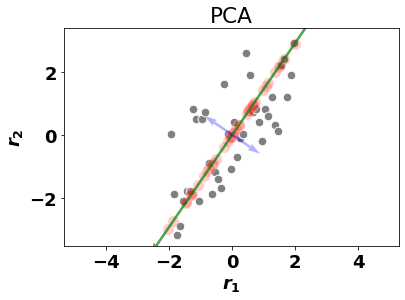

In [6]:
# generate random 2D data (2 neurons, 40 data points each)
t = 40
r1 = [i for i in range(40)]
r2 = [i+np.random.randint(-20,20) for i in range(40)]
data = np.array([r1,r2]) / 10

# pca and plot
pca2D(data)

### Replicating Figure 2

Reproduction of Figure 2 from [Dimensionality reduction for large-scale neural recordings](https://www.nature.com/articles/nn.3776)

![Dimensionality Reduction](images/fig2_cunningham2014.png "Illustration of Dimensionality Reduction")

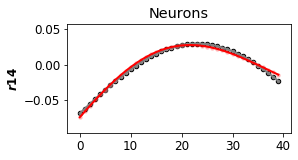

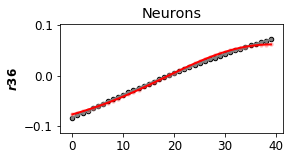

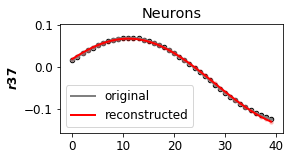

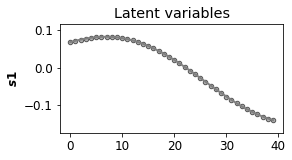

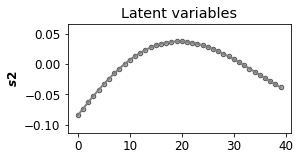

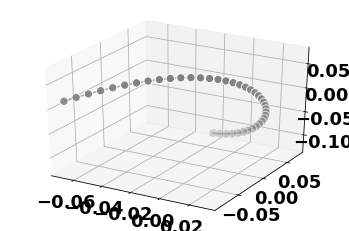

In [7]:
t = 40 # number of data points for each neuron
n = 50 # number of neurons

# generate fake firing rate matrix
r = np.ndarray(shape=(n,t))
for n_ in range(n):
    A = np.random.randint(1,5) # amplitude
    angFreq = np.random.uniform(low=0.01, high=0.2) # angular frequency
    phase = np.random.rand() # phase
    for t_ in range(t):
        r[n_,t_] = (A*np.sin(angFreq*t_ + phase**2) + 4) / 10

# pick 3 neurons at random to work with
possible = np.arange(n)
np.random.shuffle(possible)
picks = possible[:3]

# pre-process data
data = r[picks,:] # grabbing the 3 randomly chosen neurons
data_centered = data - np.mean(data,axis=1).reshape(3,1) # mean center
data_cov = data_centered @ data_centered.T # covariance matrix (<x,x.T>)

# PCA
K = 2 # number of latent variables
u, s, v = np.linalg.svd(data_cov, full_matrices=True) # svd
W = v[:K,:] # top K eigenvectors (weights)
# pca = PCA(n_components=K).fit(data_cov)
# W = pca.components_

# compute s1(t) and s2(t) (not eigenvectors, see fig2)
# s1 and s2 = weights.T * data  (2x3)x(3xt) = 2xt
latent_data = W @ data_centered

# compute reconstructed neurons 
reconstructed_data = W.T @ latent_data

## plotting

# plot neurons and reconstructed neurons
for i in range(data.shape[0]):
    fig = plt.figure(figsize=(4,2))
    uncleanPlot()
    plt.title('Neurons')
    plt.scatter(np.arange(t),data_centered[i,:], s=20 ,c='grey',edgecolor='black')
    plt.plot(np.arange(t),data_centered[i,:],c='grey', linewidth=2)
    plt.scatter(np.arange(t),reconstructed_data[i,:], s=20 ,c='red',alpha=0.3,edgecolor='white')
    plt.plot(np.arange(t),reconstructed_data[i,:],c='red', linewidth=2)
    plt.ylabel('$r{}$'.format(str(picks[i])))
plt.legend(['original','reconstructed'],loc='best')
plt.show()

# plot latent variables (s1 and s2 in fig2)
for i in range(latent_data.shape[0]):
    fig = plt.figure(figsize=(4,2))
    uncleanPlot()
    plt.title('Latent variables')
    plt.scatter(np.arange(t),latent_data[i,:], s=20 ,c='grey',alpha=0.6,edgecolor='black')
    plt.plot(np.arange(t),latent_data[i,:],c='grey', linewidth=2)
    plt.ylabel('$s{}$'.format(str(i+1)))
    plt.show()
    
# plot the 3 neurons in population space
fig = plt.figure()
cleanPlot()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_centered[0,:], data_centered[1,:], data_centered[2,:], s=70, c='gray', edgecolors='w')
ax.plot(data_centered[0,:], data_centered[1,:], data_centered[2,:], c='gray', alpha=0.6)

# # overlay s1 and s2 vectors (again, not eigenvalues), (s1 = W[0,:])
# s1 = W[0,:]
# s2 = W[1,:]
# ax.quiver(0,0,0,s1[0],s1[1],s1[2])
# ax.quiver(0,0,0,s2[0],s2[1],s2[2])

# # plot s1,s2 plane (by finding span of vectors of s)
# s1 /= np.linalg.norm(s1)
# s2 /= np.linalg.norm(s2)
# p = origin
# v3 = np.cross(s1,s2) # get plane's normal vector
# # create grid points on plane
# [x , y] = np.meshgrid( p[0]+np.linspace(0,0.5,10) , p[1]+np.linspace(0,0.5,10) );
# z = p[2] - (v3[0]*(x-p[0]) + v3[1]*(y-p[1]))/v3[2]; # Equation for a plane
# surf = ax.plot_surface(x, y, z, linewidth=0, alpha=0.2)
plt.show()

## Factor Analysis (FA) 
Sklearn on FA: https://scikit-learn.org/stable/modules/decomposition.html#fa

Compare FA to PCA for a 2D dataset

The typical aim of factor analysis is to determine the factors accounting for the structure of the correlations between measured variables

### PCA vs. Factor Analysis
This is kind of a hot topic - they're definitely not the same but there are lots of similarities in the way they work

Factor analysis is similar to PCA, which was covered previously. However, there is an important distinction to be made. PCA is a linear transformation of the data to a different space where the first component "explains" the variance of the data, and each subsequent component is orthogonal to the first component.

For example, you can think of PCA as taking a dataset of N dimensions and going down to some space of M dimensions, where M < N.

Factor analysis, on the other hand, works under the assumption that there are only M important features and a linear combination of these features (plus noise) creates the dataset in N dimensions. To put it another way, you don't do regression on an outcome variable, you do regression on the features to determine the latent factors of the dataset.

### This is what might be expected

Image of difference b/w FA and PCA from Yu et al. 2009 (GPFA Paper). FA (green line) is better able to uncover the true firing-rate relationship (black line) between the two neurons than PCA/PPCA (red line). The noise-corrupted observations (blue dots) and two SD covariance ellipse (dashed blue) are shown.

![PCA_FA](images/fig4_Yu2009.png "Illustration of difference between PCA and FA")

In [84]:
# Create the data

n_samples, n_features, rank = 100, 2, 2
sigma = 1.
rng = np.random.RandomState(42)
U, _, _ = np.linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_homo = X + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.
X_hetero = X + rng.randn(n_samples, n_features) * sigmas

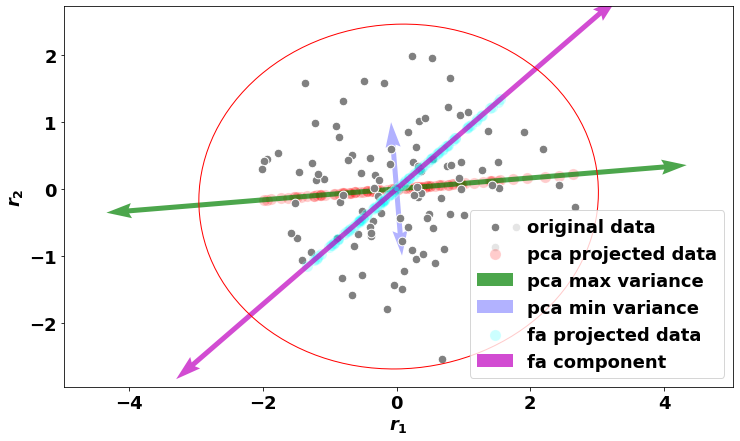

In [89]:
# plot pca vs fa 
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()

pca2D(X.T, ax)
FA2D(X.T, ax)
confidence_ellipse(X[:,0], X[:,1], ax, edgecolor='red')

ax.set_xlabel('$r_1$')
ax.set_ylabel('$r_2$')
ax.axis('equal')
ax.legend(loc='best')
plt.show()

These plots show that factor analysis takes into account the random error that is inherent in measurement, whereas PCA fails to do so.

## Gaussian Process Factor Analysis (GPFA)

Resources:
1. Main paper - https://web.stanford.edu/~shenoy/GroupPublications/YuEtAlNIPS2009.pdf
2. Main code - https://users.ece.cmu.edu/~byronyu/software.shtml
3. Tutorial - https://elephant.readthedocs.io/en/latest/tutorials/gpfa.html

Variational Latent Gaussian Process

https://arxiv.org/pdf/1604.03053.pdf

https://github.com/catniplab/vlgp

https://www.youtube.com/watch?v=CrY5AfNH1ik

Next steps:
3. Read GPFA
4. Read vLGP
5. GPFA (single trials), PCA (trial-averaged), and vLGP on chand's data